# Task 1/4 Principal Component Analysis Part 2

In this part, we will process an image of a raccoon with PCA.  
We take the columns of the figure as data points, and apply SVD. We reconstruct the image with different number of principal components and analyze the results.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import cv2
%matplotlib inline

We first download the figure on this [website](https://pixnio.com/fauna-animals/raccoons/raccoon-procyon-lotor), and put it in the current directory. We load the figure, and convert it to gray-scale, and resize it to (249, 185). After that, we store the figure as a numpy array.

In [2]:
img = np.asarray(Image.open('raccoon.jpg').convert("L").resize((249, 185)))
print(repr(img))

array([[120, 143, 123, ..., 157, 124, 123],
       [106, 141, 130, ..., 107, 118, 126],
       [102, 111, 160, ..., 123,  98,  59],
       ...,
       [135, 120, 132, ..., 140, 141, 140],
       [122, 122, 134, ..., 144, 144, 144],
       [115, 133, 141, ..., 143, 143, 145]], dtype=uint8)


We take a look at the original figure.

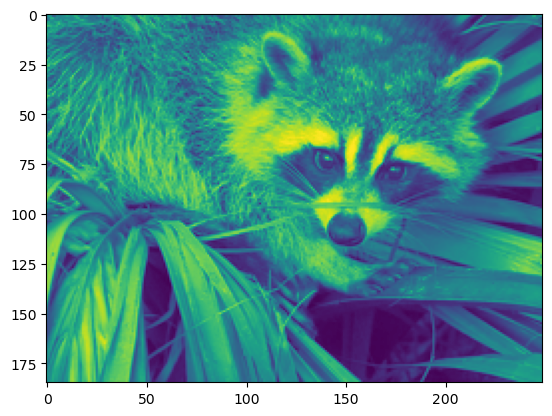

In [3]:
plt.imshow(img)

Detecting edges with Canny.

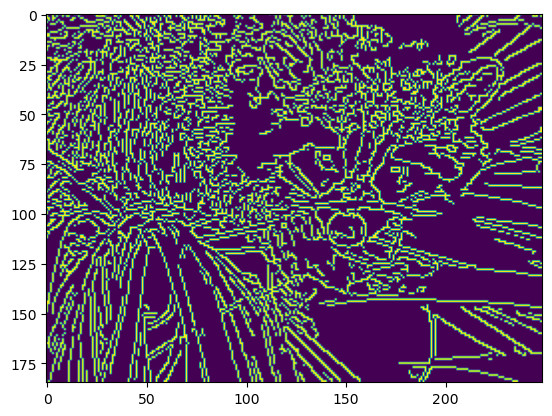

In [4]:
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges)

Now let's check if the figure has the expected shape.

In [5]:
img.shape

(185, 249)

We create a PCA instance. Note here we take columns of the figure as data points, so we need to transpose the matrix.

In [6]:
raccoon = PCA(img.T)

We obtain the array containing eigenvalues.

In [7]:
_, s, _ = raccoon.svd(full_matrices=False)

We call the `reconstruct` method to reconstruct the image with all principal components and visualize it.

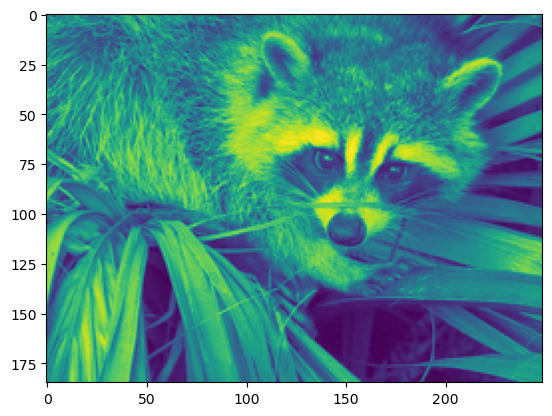

In [8]:
img_all = raccoon.reconstruct(s.shape[0], full_matrices=False)
plt.imshow(img_all.T)

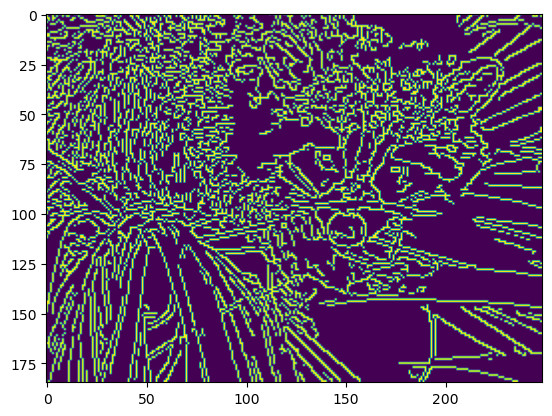

In [9]:
gray_img_all = cv2.convertScaleAbs(img_all.T)
edges_all = cv2.Canny(gray_img_all, 100, 200)
plt.imshow(edges_all)

We reconstruct the image with 120 principal components.

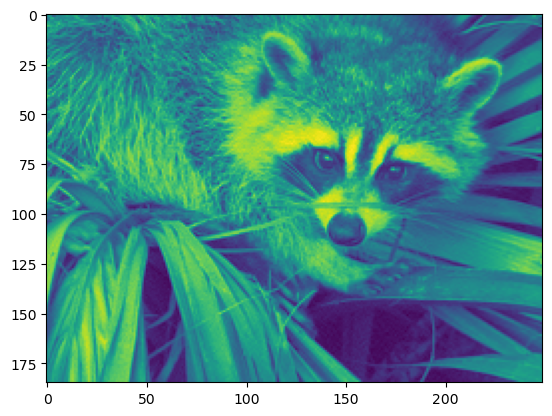

In [10]:
img_120 = raccoon.reconstruct(120, full_matrices=False)
plt.imshow(img_120.T)

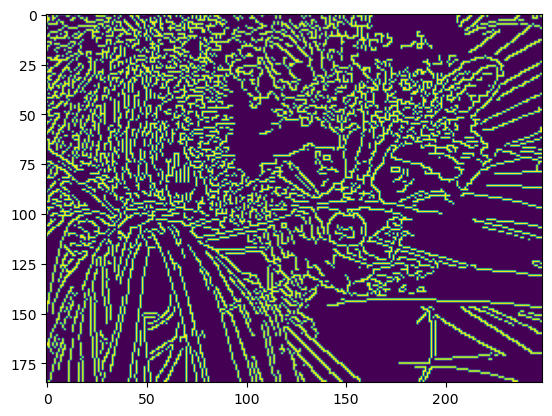

In [11]:
gray_img_120 = cv2.convertScaleAbs(img_120.T)
edges_120 = cv2.Canny(gray_img_120, 100, 200)
plt.imshow(edges_120)

We reconstruct the image with 50 principal components.

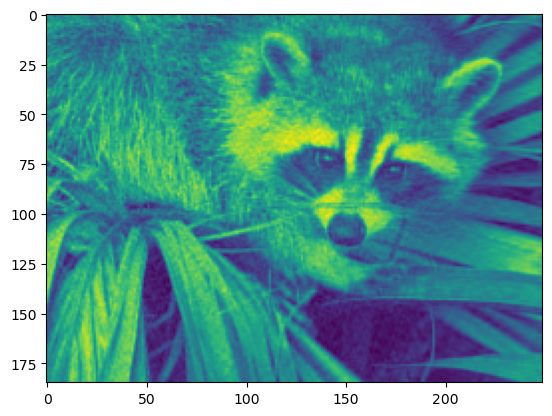

In [12]:
img_50 = raccoon.reconstruct(50, full_matrices=False)
plt.imshow(img_50.T)

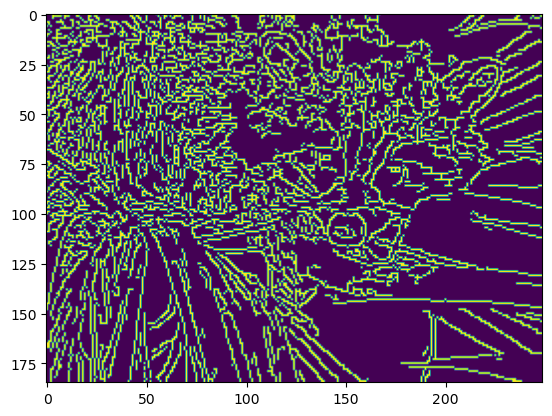

In [13]:
gray_img_50 = cv2.convertScaleAbs(img_50.T)
edges_50 = cv2.Canny(gray_img_50, 100, 200)
plt.imshow(edges_50)

We reconstruct the image with 10 principal components.

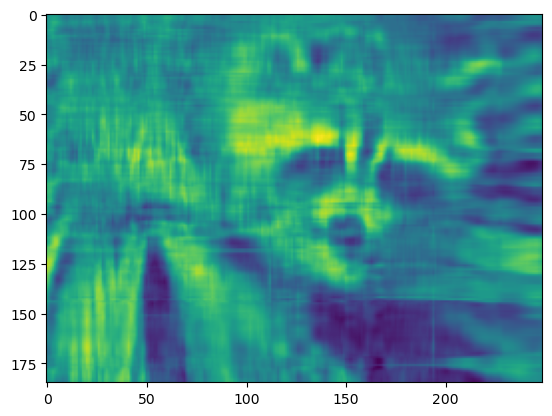

In [14]:
img_10 = raccoon.reconstruct(10, full_matrices=False)
plt.imshow(img_10.T)

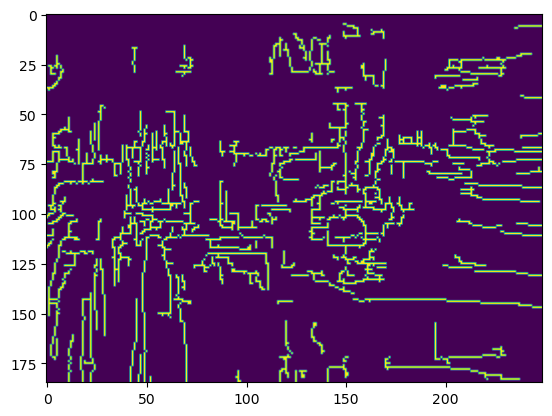

In [15]:
gray_img_10 = cv2.convertScaleAbs(img_10.T)
edges_10 = cv2.Canny(gray_img_10, 100, 200)
plt.imshow(edges_10)

Finally, we call `energy_loss` method to compute what number is the “energy” lost through truncation smaller than 1%.

In [16]:
raccoon.energy_loss(0.01)

165

We also compute how many components do we need to capture 90% of the energy.

In [17]:
raccoon.energy_loss(0.1)

101

We compute the Frobenius norm as a measurement for error.

In [18]:
err = []
err.append(np.linalg.norm(img_all.T - img, 'fro'))
err.append(np.linalg.norm(img_120.T - img, 'fro'))
err.append(np.linalg.norm(img_50.T - img, 'fro'))
err.append(np.linalg.norm(img_10.T - img, 'fro'))

Merge all the images into one large image.

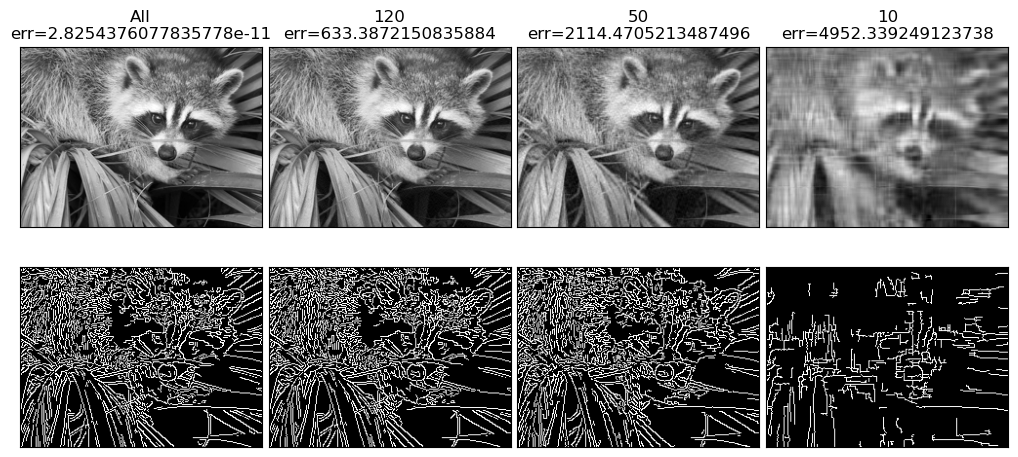

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))  # Adjust figsize to make the plot more compact

axs[0, 0].imshow(img_all.T, cmap='gray')
axs[0, 0].set_title(f'All\nerr={err[0]}'), axs[0, 0].set_xticks([]), axs[0, 0].set_yticks([])

axs[1, 0].imshow(edges_all, cmap='gray')
axs[1, 0].set_xticks([]), axs[1, 0].set_yticks([])

axs[0, 1].imshow(img_120.T, cmap='gray')
axs[0, 1].set_title(f'120\nerr={err[1]}'), axs[0, 1].set_xticks([]), axs[0, 1].set_yticks([])

axs[1, 1].imshow(edges_120, cmap='gray')
axs[1, 1].set_xticks([]), axs[1, 1].set_yticks([])

axs[0, 2].imshow(img_50.T, cmap='gray')
axs[0, 2].set_title(f'50\nerr={err[2]}'), axs[0, 2].set_xticks([]), axs[0, 2].set_yticks([])

axs[1, 2].imshow(edges_50, cmap='gray')
axs[1, 2].set_xticks([]), axs[1, 2].set_yticks([])

axs[0, 3].imshow(img_10.T, cmap='gray')
axs[0, 3].set_title(f'10\nerr={err[3]}'), axs[0, 3].set_xticks([]), axs[0, 3].set_yticks([])

axs[1, 3].imshow(edges_10, cmap='gray')
axs[1, 3].set_xticks([]), axs[1, 3].set_yticks([])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()